# Transientes de calcio registradas en rebanadas cerebrales: Apertura de archivos tipo *.pxp

### Marco Arieli Herrera-Valdez$^1$
#### $^1$ Laboratorio de Fisiología de Sistemas, Facultad de Ciencias, UNAM
##### Ultima revisión: 2019.12.31

En este tutorial se muestra como abrir un archivo tipo *.pxp y como explorar su contenido para extraer datos de un registro de transientes de calcio. Los datos ya han sido preprocesados y están en arreglos que contienen 0 o 1 en cada entrada dependiendo de si hay un pulso de calcio para cada registro. El script está escrito bajo la suposición de que hay un directorio llamado "datosMuestra" y dentro de ese directorio hay un archivo que se llama "muestraTransientesCalcio_raster2.pxp"


In [1]:
import os
import scipy as sc
import matplotlib.pyplot as gr
%matplotlib inline

Matplotlib is building the font cache using fc-list. This may take a moment.


Importamos libreria de Igor

In [2]:
import igor.igorpy as igor

In [62]:
dataDir = "./datosMuestra/"
archivo = dataDir + "muestraTransientesCalcio_raster2.pxp"

In [33]:
rawData=igor.load(archivo)

Ahora exploramos el tipo de variable en el que se guardaron los datos y sus dimensiones


In [34]:
type(rawData)

igor.igorpy.Folder

Como los datos están guardados en un folder de Igor, hay que extraer primero los arreglos relevantes. 
Los folders de datos contienen cuatro tipos de objetos:

    Data arrays (waves)
    Numeric variables
    String variables
    Other data folders

In [35]:
for c in rawData.children:
    print(type(c))

<class 'igor.igorpy.Variables'>
<class 'igor.igorpy.History'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.Wave'>
<class 'igor.igorpy.

In [36]:
print(len(rawData.children))

1003


Now get the data and start splitting it

In [27]:
bbb=rawData.children[0].userstr[b"S_waveNames"]
aaa=bbb.decode("UTF-8")
dataNames= aaa.split(";")[:-1]

Sacar los datos y acomodarlos en un arreglo

In [37]:
extractedData1=list()
extractedData2=list()
for nam in dataNames:
    if len(nam)>3:
        myInd=sc.int32(nam[4:]) -1
        str2= "w2=rawData." + nam + ".data"%(myInd)
        exec(str2)
        extractedData2.append(w2)
    else:
        print("Found empty string")

data=sc.array(extractedData2)

<ipython-input-37-19c6e6813412>:12: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  data=sc.array(extractedData2)


Exploramos los datos para ver las dimensiones de las series de tiempo dentro del campo 'Spikes'. Vemos que es un arreglo. 


In [38]:
data

array([[481.19 , 483.19 , 475.143, ..., 509.286, 502.238, 502.143],
       [435.476, 438.381, 436.19 , ..., 434.238, 426.857, 436.429],
       [439.238, 441.762, 438.381, ..., 472.19 , 472.905, 471.81 ],
       ...,
       [698.714, 692.857, 687.857, ..., 666.524, 657.524, 656.286],
       [662.381, 675.286, 670.   , ..., 674.048, 683.476, 688.095],
       [585.143, 584.095, 579.19 , ..., 581.238, 578.524, 586.381]])

Los datos en este caso son los tiempos en los cuales hay disparos y están guardados en un arreglo

In [45]:
print('Las dimensiones del arreglo son:')
print(sc.shape(data))

El campo 'Spikes' tiene una variable de tipo <class 'numpy.ndarray'>
Las dimensiones del arreglo son:
(330, 1001)


<ipython-input-45-d5f7e6f49661>:3: DeprecationWarning: scipy.shape is deprecated and will be removed in SciPy 2.0.0, use numpy.shape instead
  print(sc.shape(data))


La primera dimensión correspone al número de células y la segunda dimensión corresponde con el número de registros.  


In [53]:
spikeTimes= data
nCells = len(spikeTimes)
print('Hay %d células en Spikes'%nCells)
print('Hay %d spikes por registro'%sc.shape(data)[1])

Hay 330 células en Spikes
Hay 1001 spikes por registro


<ipython-input-53-4d1c3e1df44d>:4: DeprecationWarning: scipy.shape is deprecated and will be removed in SciPy 2.0.0, use numpy.shape instead
  print('Hay %d spikes por registro'%sc.shape(data)[1])


Exploremos los datos para ver disparos en algunas de las celulas 

<ipython-input-54-fd09088dbf26>:5: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  gr.plot(train, (n+1)*sc.ones(len(train)),'|')
<ipython-input-54-fd09088dbf26>:5: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  gr.plot(train, (n+1)*sc.ones(len(train)),'|')
<ipython-input-54-fd09088dbf26>:5: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  gr.plot(train, (n+1)*sc.ones(len(train)),'|')
<ipython-input-54-fd09088dbf26>:5: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  gr.plot(train, (n+1)*sc.ones(len(train)),'|')
<ipython-input-54-fd09088dbf26>:5: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  gr.plot(train, (n+1)*sc.ones(len(train)),'|')
<ipython-input-54-fd09088dbf26>:5: DeprecationWarning: scipy.ones

<ipython-input-54-fd09088dbf26>:5: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  gr.plot(train, (n+1)*sc.ones(len(train)),'|')
<ipython-input-54-fd09088dbf26>:5: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  gr.plot(train, (n+1)*sc.ones(len(train)),'|')
<ipython-input-54-fd09088dbf26>:5: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  gr.plot(train, (n+1)*sc.ones(len(train)),'|')
<ipython-input-54-fd09088dbf26>:5: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  gr.plot(train, (n+1)*sc.ones(len(train)),'|')
<ipython-input-54-fd09088dbf26>:5: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  gr.plot(train, (n+1)*sc.ones(len(train)),'|')
<ipython-input-54-fd09088dbf26>:5: DeprecationWarning: scipy.ones

<ipython-input-54-fd09088dbf26>:5: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  gr.plot(train, (n+1)*sc.ones(len(train)),'|')
<ipython-input-54-fd09088dbf26>:5: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  gr.plot(train, (n+1)*sc.ones(len(train)),'|')
<ipython-input-54-fd09088dbf26>:5: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  gr.plot(train, (n+1)*sc.ones(len(train)),'|')
<ipython-input-54-fd09088dbf26>:5: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  gr.plot(train, (n+1)*sc.ones(len(train)),'|')
<ipython-input-54-fd09088dbf26>:5: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  gr.plot(train, (n+1)*sc.ones(len(train)),'|')
<ipython-input-54-fd09088dbf26>:5: DeprecationWarning: scipy.ones

<ipython-input-54-fd09088dbf26>:5: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  gr.plot(train, (n+1)*sc.ones(len(train)),'|')
<ipython-input-54-fd09088dbf26>:5: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  gr.plot(train, (n+1)*sc.ones(len(train)),'|')
<ipython-input-54-fd09088dbf26>:5: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  gr.plot(train, (n+1)*sc.ones(len(train)),'|')
<ipython-input-54-fd09088dbf26>:5: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  gr.plot(train, (n+1)*sc.ones(len(train)),'|')
<ipython-input-54-fd09088dbf26>:5: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  gr.plot(train, (n+1)*sc.ones(len(train)),'|')
<ipython-input-54-fd09088dbf26>:5: DeprecationWarning: scipy.ones

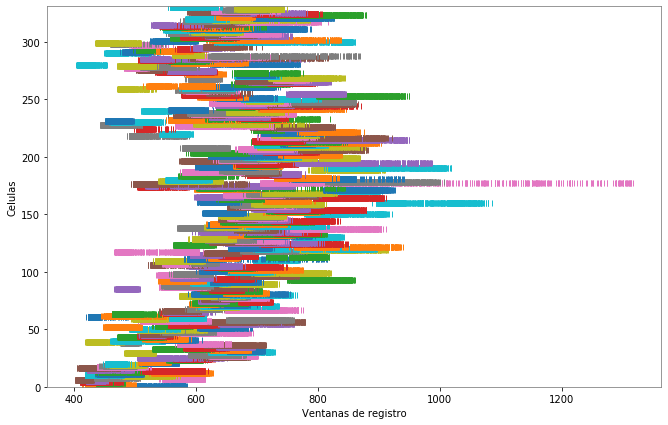

In [54]:
f=gr.figure(figsize=(11,7));
gr.ioff()
for n in range(nCells):
    train=spikeTimes[n]
    gr.plot(train, (n+1)*sc.ones(len(train)),'|')
gr.ylim(0,nCells+1)
gr.ylabel('Celulas')
gr.xlabel('Ventanas de registro')
gr.ion(); gr.draw(); 


Ahora guardemos los datos en un arreglo de texto para poder tener acceso al registro en un formato más general (no comercial)


In [59]:
archTxt = archivo[:-4]+'.txt'
print('Guardando datos en archivo %s'%archTxt)
sc.savetxt(archTxt, spikeTimes, fmt='%g', delimiter=' ', newline='n', header='', footer='', comments='# ', encoding=None)

Guardando datos en archivo ./datosMuestra/muestraTransientesCalcio_raster2.txt


<ipython-input-59-96976741e14e>:3: DeprecationWarning: scipy.savetxt is deprecated and will be removed in SciPy 2.0.0, use numpy.savetxt instead
  sc.savetxt(archTxt, spikeTimes, fmt='%g', delimiter=' ', newline='n', header='', footer='', comments='# ', encoding=None)



Verificación de que los datos están donde queríamos



In [63]:
os.listdir(dataDir)

['.DS_Store',
 'muestraTransientesCalcio_raster2.pxp',
 'muestraTransientesCalcio_raster1.txt',
 'muestraTransientesCalcio_raster2.txt',
 'muestraTransientesCalcio_raster1.mat']